## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


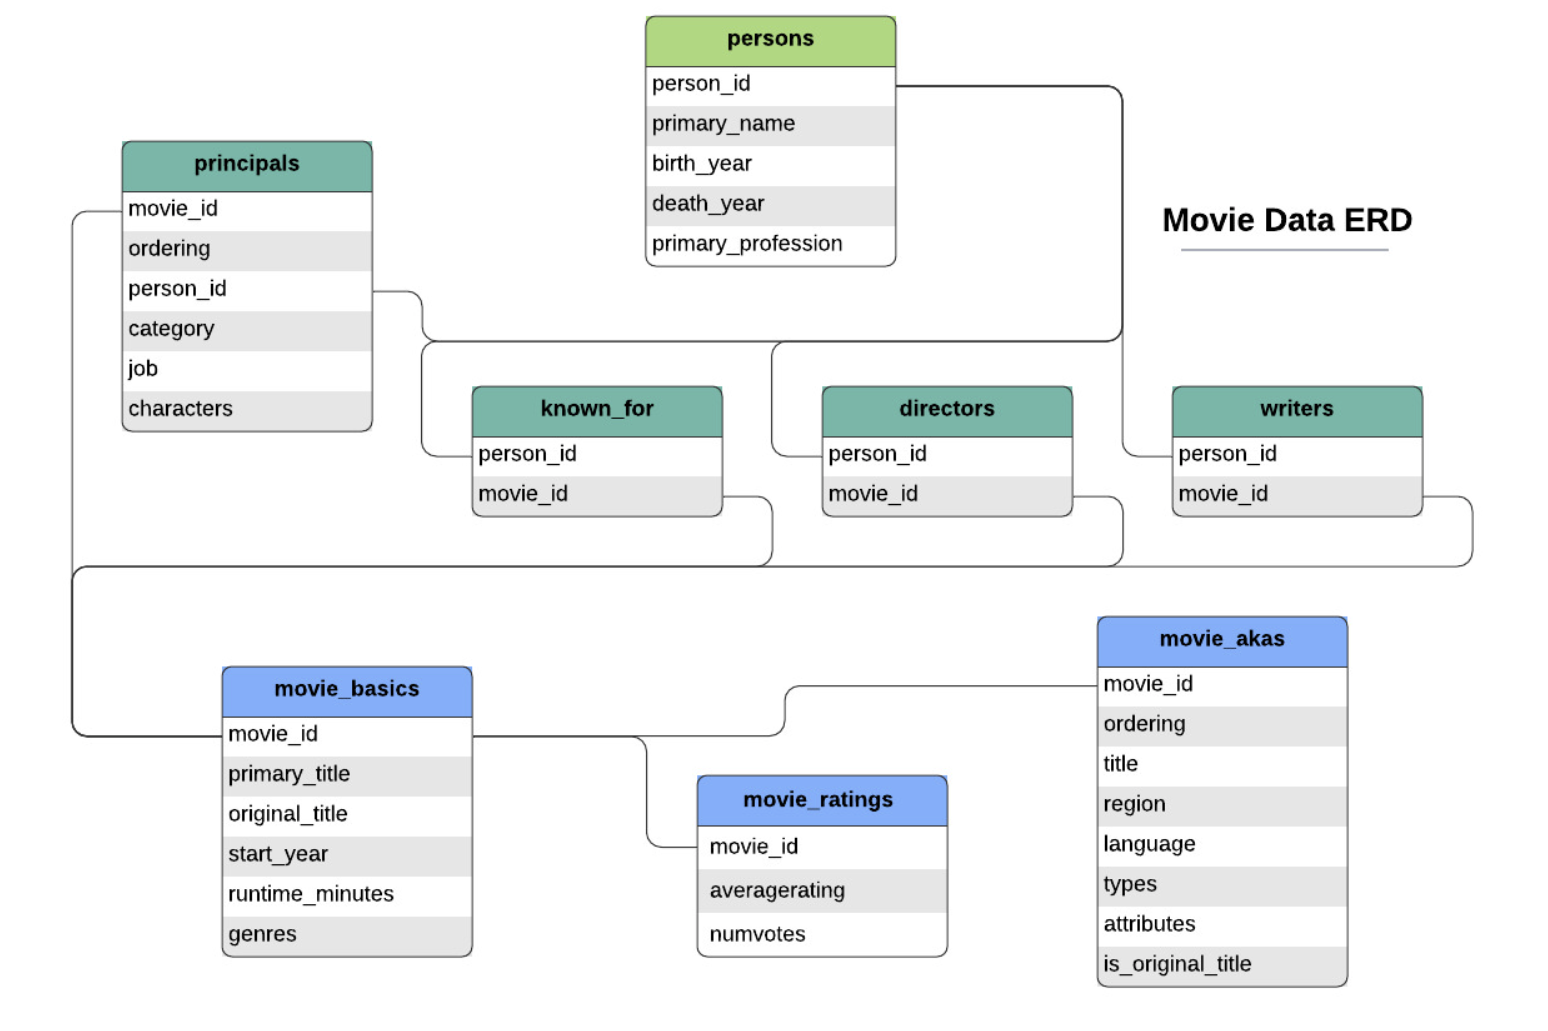

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter

In [2]:
# Connect these


# movie_basics: df_a
# movie_id (key)
# primary_title
# runtime_minutes
# genres

# directors: df_b
# movie_id (key)
# person_id
# movie_id

# Persons: df_e
# person_id (key)
# primary_name
# death_year (exclude those who have died)

# pd.read_csv('zippedData/tn.movie_budgets.csv.gz'):
# movie (key) -- Clean the heck out of it
# production_budget
# domestic_gross
# worldwide_gross

In [3]:
conn = sqlite3.connect('data/im.db')

In [4]:
cur = conn.cursor()

In [5]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

In [6]:
table_names = cur.fetchall()

In [7]:
for name in table_names:
    print(name[0])

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers
movie_budge_table
title
movie_gross_table


In [8]:
conn.close()

In [9]:
conn = sqlite3.connect('data/im.db')

In [10]:
a = """
SELECT DISTINCT
*
FROM movie_basics
ORDER BY movie_id

"""

b = """
SELECT *
FROM directors

"""

c = """
SELECT *
FROM known_for

"""


d = """
SELECT *
FROM movie_akas

"""


e = """
SELECT *
FROM movie_ratings

"""



f = """
SELECT *
FROM persons

"""


g = """
SELECT *
FROM principals

"""


h = """
SELECT *
FROM writers

"""


In [11]:
df_a = pd.read_sql(a,conn)

In [12]:
df_b = pd.read_sql(b,conn)

In [13]:
df_c = pd.read_sql(c,conn)

In [14]:
df_d = pd.read_sql(d,conn)

In [15]:
df_e = pd.read_sql(e,conn)

In [16]:
df_f = pd.read_sql(f,conn)

In [17]:
df_g = pd.read_sql(g,conn)

In [18]:
df_h = pd.read_sql(h,conn)

In [19]:
df_a.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [20]:
df_b.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [21]:
df_c.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [22]:
d = """
SELECT *
FROM movie_akas
WHERE attributes <> 'None'
"""

df_d = pd.read_sql(d,conn)

In [23]:
df_d.head(40)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
1,tt0369610,21,Jurassic World 3D,US,None,None,3-D version,0.0
2,tt0369610,22,Jurassic World 3D,DE,None,None,3-D version,0.0
3,tt0369610,23,Jurassic World 3D,XWW,None,None,3-D version,0.0
4,tt0369610,2,Ebb Tide,US,None,None,fake working title,0.0
5,tt0369610,35,Jurassic Park 4,TR,tr,None,informal alternative title,0.0
6,tt0369610,44,Jurassic Park 4,US,None,None,informal alternative title,0.0
7,tt0369610,7,Mundo Jurásico,UY,None,None,3-D version,0.0
8,tt0369610,8,Jurassic World 3D,PL,None,None,3-D version,0.0
9,tt0401729,14,John Carter Maaveeran,IN,ta,None,dubbed version,0.0


In [24]:
df_e.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [25]:
df_f.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [26]:
df_g.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [27]:
df_h.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [28]:
df_check = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [29]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [30]:
df_check.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [32]:
pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='ISO-8859-1')

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [33]:
pd.read_csv('zippedData/tmdb.movies.csv.gz')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [34]:
pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [35]:
gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [36]:
gross_df.to_sql('title', conn, if_exists='replace', index=False)

In [37]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',), ('movie_budge_table',), ('movie_gross_table',), ('title',)]


In [38]:


# Read the CSV file
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

# Create a connection to the SQLite database
conn = sqlite3.connect('data/im.db')

# Create a table from the movie_gross DataFrame
movie_gross.to_sql('movie_gross_table', conn, if_exists='replace', index=False)


In [39]:
# Create a connection to the SQLite database
conn = sqlite3.connect('data/im.db')

# Define the SQL query to join the two tables
sql_query = '''
    SELECT DISTINCT
        per.person_id AS person_id,
        per.primary_name,
        per.death_year,
        der.movie_id AS movie_id,
        mb.primary_title,
        mb.runtime_minutes,
        mb.genres,
        mr.averagerating,
        mr.numvotes,
        1 as count
    FROM persons per
    LEFT JOIN directors der 
        ON per.person_id = der.person_id
    LEFT JOIN movie_basics mb
        ON mb.movie_id = der.movie_id
    
    LEFT JOIN movie_ratings mr
        ON mb.movie_id = mr.movie_id
    
    ORDER BY person_id
'''


# Execute the SQL query and fetch the results
results_db = pd.read_sql(sql_query, conn)

# Close the database connection
conn.close()

# Print the column names in the joined table
print(results_db.columns)

Index(['person_id', 'primary_name', 'death_year', 'movie_id', 'primary_title',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'count'],
      dtype='object')


In [40]:
results_db = results_db[pd.isna(results_db['death_year'])]

In [100]:
results_db['death_year'].min()

nan

In [92]:
results_db.isnull().sum()

person_id              0
primary_name           0
death_year         85331
movie_id               0
primary_title          0
runtime_minutes     8823
genres               793
averagerating          0
numvotes               0
count                  0
dtype: int64

In [109]:
results_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85331 entries, 44 to 660916
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   person_id        85331 non-null  object 
 1   primary_name     85331 non-null  object 
 2   death_year       0 non-null      float64
 3   movie_id         85331 non-null  object 
 4   primary_title    85331 non-null  object 
 5   runtime_minutes  76508 non-null  float64
 6   genres           84538 non-null  object 
 7   averagerating    85331 non-null  float64
 8   numvotes         85331 non-null  float64
 9   count            85331 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 7.2+ MB


In [91]:
results_db = results_db.dropna(subset=['movie_id', 'averagerating'])

In [119]:
### Nulls will not be counted in function below - does calc with only nulls

agg_funcs = {
    'averagerating': 'mean',
    'numvotes': 'sum',
    'runtime_minutes': 'mean',
    'death_year': 'max',
    'count': 'sum',
    'primary_title': lambda x: ', '.join([str(i).strip().lower().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),
'genres': lambda x: ', '.join([str(i).strip().lower().replace('none', '').replace('nan', '').replace('  ', ' ') for i in x.unique()]),


}


director_agg = results_db.groupby('primary_name').agg(agg_funcs)

In [120]:
director_agg['count'].max()

39

In [121]:
director_agg = director_agg.sort_values('averagerating', ascending=False)

In [124]:
director_agg.head(40)

,averagerating,numvotes,runtime_minutes,death_year,count,primary_title,genres
primary_name,,,,,,,
Josh Lowell,8.230000,11660.0,112.875000,NaN,10,"reel rock 7, reel rock 8, reel rock 6, reel ro...","documentary, documentary,sport, sport, adventu..."
Peter Mortimer,8.230000,11660.0,112.875000,NaN,10,"reel rock 7, reel rock 8, reel rock 6, reel ro...","documentary, documentary,sport, sport, adventu..."
Pauli Janhunen Calderón,8.200000,387.0,77.272727,NaN,11,"clank and goldscar, rinoplasticos: a warrior's...","action, action,adventure,sci-fi, action,animat..."
Paul Dugdale,7.926667,4516.0,98.785714,NaN,15,"the prodigy: world's on fire, emeli sandé live...","documentary, music, documentary,music, biography"
Marco Romano,7.620000,247.0,156.800000,NaN,10,"nothing, owl looked at the wet floor with deat...","drama, horror,thriller, drama,horror,sci-fi"
Roger Lay Jr.,7.564286,306.0,95.384615,NaN,14,"toy masters, stardate revisited: the origin of...","biography,comedy,documentary, documentary"
Shiboprosad Mukherjee,7.554545,5146.0,140.636364,NaN,11,"icche, muktodhara, alik sukh - a tale of fleet...","drama, drama,family, comedy,drama,romance, com..."
Nandita Roy,7.554545,5146.0,140.636364,NaN,11,"icche, muktodhara, alik sukh - a tale of fleet...","drama, drama,family, comedy,drama,romance, com..."
Sergey A.,7.441026,1511.0,62.102564,NaN,39,"forest of the dead sharks, watch movie free on...","action,comedy,horror, action,adventure,comedy,..."


In [ ]:
# director_db = director_db.loc[director_db['rounded_avg_rating'] >= 8]

In [123]:
director_agg = director_agg.loc[director_agg['count'] >= 10]

In [125]:
director_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Josh Lowell to Eldar Bogunov
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    200 non-null    float64
 1   numvotes         200 non-null    float64
 2   runtime_minutes  200 non-null    float64
 3   death_year       0 non-null      float64
 4   count            200 non-null    int64  
 5   primary_title    200 non-null    object 
 6   genres           200 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 12.5+ KB


<AxesSubplot:ylabel='averagerating'>

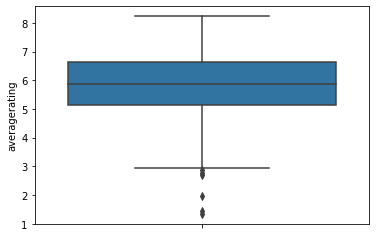

In [126]:
# Create a box plot of the 'averagerating' column
sns.boxplot(data=director_agg, y='averagerating')

<AxesSubplot:ylabel='averagerating'>

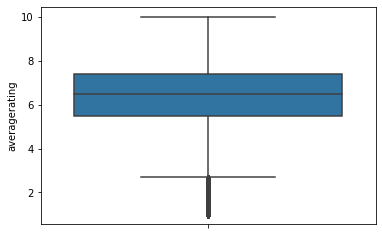

In [127]:
# Create a box plot of the 'averagerating' column
sns.boxplot(data=results_db, y='averagerating')

KeyboardInterrupt: 

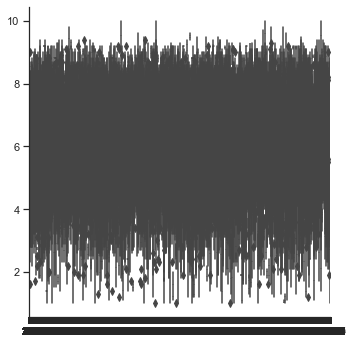

In [130]:
# sns.set(style="ticks")

# # Create a box plot for each primary_name
# sns.catplot(x="primary_name", y="averagerating", kind="box", data=results_db)

# # Rotate x-axis labels
# plt.xticks(rotation=90)

# # Show the plot
# plt.show()

In [131]:
director_agg = director_agg.head(20)

In [137]:
director_agg = director_agg.reset_index()

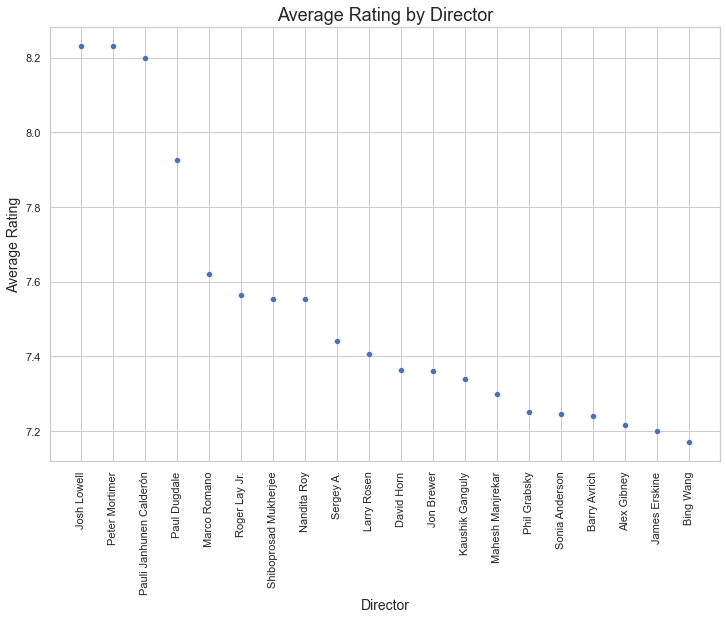

In [138]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x="primary_name", y="averagerating", data=director_agg, ax=ax)

ax.set_title("Average Rating by Director", fontsize=18)
ax.set_xlabel("Director", fontsize=14)
ax.set_ylabel("Average Rating", fontsize=14)

plt.xticks(rotation=90)

plt.show()

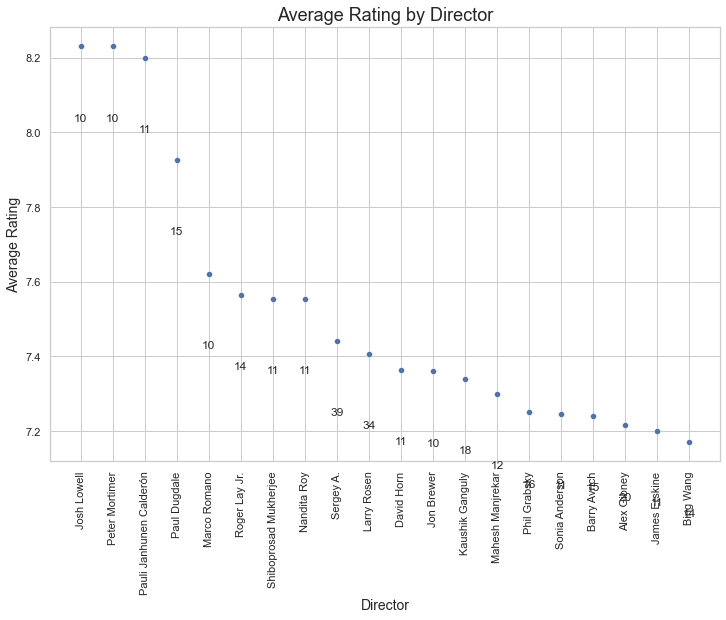

In [139]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x="primary_name", y="averagerating", data=director_agg, ax=ax)

ax.set_title("Average Rating by Director", fontsize=18)
ax.set_xlabel("Director", fontsize=14)
ax.set_ylabel("Average Rating", fontsize=14)

plt.xticks(rotation=90)

# Add counts as label for each point
for i in range(len(director_agg)):
    x = director_agg.index[i]
    y = director_agg.iloc[i]['averagerating']
    count = director_agg.iloc[i]['count']
    ax.text(i, y-0.2, count, ha="center", fontsize=12)

plt.show()

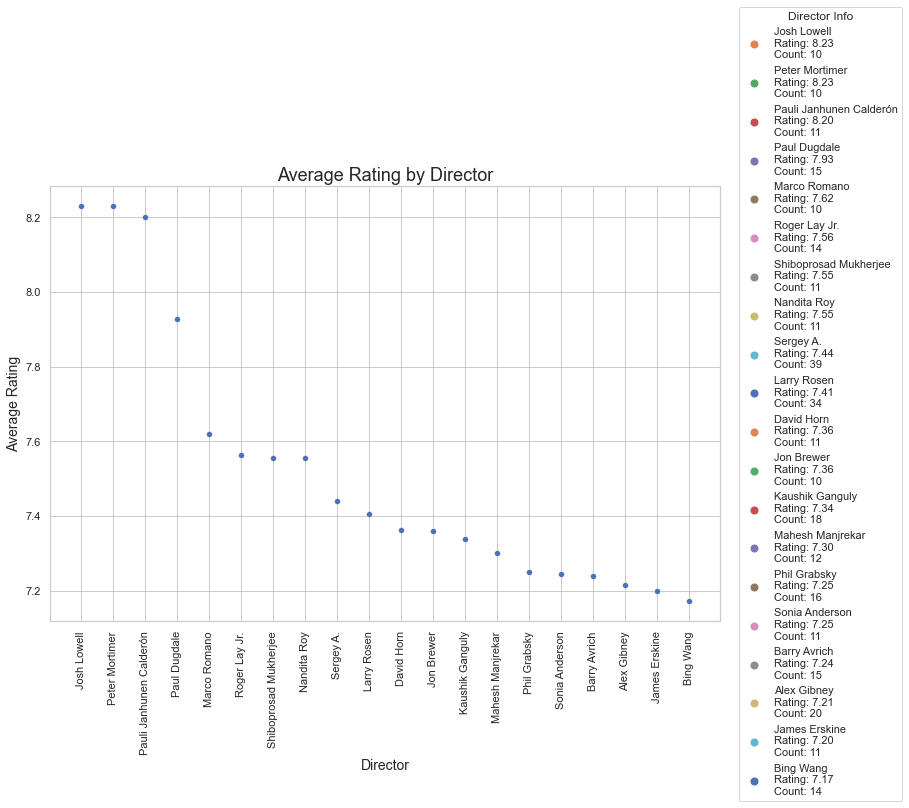

In [144]:
fig, ax = plt.subplots(figsize=(12,8))

# Scatterplot
sns.scatterplot(x="primary_name", y="averagerating", data=director_agg, ax=ax)

# Set plot title and axis labels
ax.set_title("Average Rating by Director", fontsize=18)
ax.set_xlabel("Director", fontsize=14)
ax.set_ylabel("Average Rating", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Create legend
handles = []
for i in range(len(director_agg)):
    name = director_agg.iloc[i]['primary_name']
    rating = director_agg.iloc[i]['averagerating']
    count = director_agg.iloc[i]['count']
    handles.append(ax.scatter([], [], label=f"{name}\nRating: {rating:.2f}\nCount: {count}", s=50))

# Move legend to the far right
plt.legend(handles=handles, title="Director Info", loc="center left", bbox_to_anchor=(1.02, 0.5))

plt.show()

In [151]:
director_agg.head(20)

,primary_name,averagerating,numvotes,runtime_minutes,death_year,count,primary_title,genres
0,Josh Lowell,8.230000,11660.0,112.875000,NaN,10,"reel rock 7, reel rock 8, reel rock 6, reel ro...","documentary, documentary,sport, sport, adventu..."
1,Peter Mortimer,8.230000,11660.0,112.875000,NaN,10,"reel rock 7, reel rock 8, reel rock 6, reel ro...","documentary, documentary,sport, sport, adventu..."
2,Pauli Janhunen Calderón,8.200000,387.0,77.272727,NaN,11,"clank and goldscar, rinoplasticos: a warrior's...","action, action,adventure,sci-fi, action,animat..."
3,Paul Dugdale,7.926667,4516.0,98.785714,NaN,15,"the prodigy: world's on fire, emeli sandé live...","documentary, music, documentary,music, biography"
4,Marco Romano,7.620000,247.0,156.800000,NaN,10,"nothing, owl looked at the wet floor with deat...","drama, horror,thriller, drama,horror,sci-fi"
5,Roger Lay Jr.,7.564286,306.0,95.384615,NaN,14,"toy masters, stardate revisited: the origin of...","biography,comedy,documentary, documentary"
6,Shiboprosad Mukherjee,7.554545,5146.0,140.636364,NaN,11,"icche, muktodhara, alik sukh - a tale of fleet...","drama, drama,family, comedy,drama,romance, com..."
7,Nandita Roy,7.554545,5146.0,140.636364,NaN,11,"icche, muktodhara, alik sukh - a tale of fleet...","drama, drama,family, comedy,drama,romance, com..."
8,Sergey A.,7.441026,1511.0,62.102564,NaN,39,"forest of the dead sharks, watch movie free on...","action,comedy,horror, action,adventure,comedy,..."
9,Larry Rosen,7.405882,1225.0,79.000000,NaN,34,"starting over, four leaf clover, forever yours...","comedy,drama,romance, crime,thriller, horror, ..."


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [76]:
director_db = results_db.dropna(subset=['movie_id'])

In [47]:
director_db = director_db.dropna(subset=['averagerating','numvotes'])

In [48]:
director_db.isna().sum()

person_id              0
primary_name           0
death_year         85331
movie_id               0
primary_title          0
runtime_minutes     8823
genres               793
averagerating          0
numvotes               0
count                  0
dtype: int64

In [49]:
director_db = director_db.groupby('primary_name').sum()

In [50]:
# director_db = results_db.groupby('primary_name').sum()

In [51]:
director_db.tail(40)

,death_year,runtime_minutes,averagerating,numvotes,count
primary_name,,,,,
Ömer Vargi,0.0,202.0,11.6,3900.0,2
Ömür Atay,0.0,0.0,6.3,64.0,1
Önder K. Açikbas,0.0,0.0,2.8,16.0,1
Öner S. Biberkökü,0.0,105.0,7.4,11.0,1
Örn Marino Arnarson,0.0,150.0,15.8,111.0,2
Öystein Thorsen,0.0,0.0,7.4,5.0,1
Özay Kanat,0.0,75.0,5.8,39.0,1
Özcan Alper,0.0,313.0,19.1,1388.0,3
Özcan Deniz,0.0,620.0,34.7,15278.0,6


In [52]:
director_db['avg_rating'] = director_db['averagerating'] / director_db['count']

In [53]:
director_db['avg_votes'] = director_db['numvotes'] / director_db['count']

In [54]:
director_db['avg_runtime'] = director_db['runtime_minutes'] / director_db['count']

In [55]:
director_db.drop(['runtime_minutes', 'averagerating', 'numvotes'], axis=1, inplace=True)

In [56]:
director_db['rounded_avg_rating'] = director_db['avg_rating'].round().astype(int)

In [57]:
director_db.head(40)

,death_year,count,avg_rating,avg_votes,avg_runtime,rounded_avg_rating
primary_name,,,,,,
A Normale Jef,0.0,1,7.200000,31.000000,142.0,7
A'Ali de Sousa,0.0,1,4.200000,55.000000,81.0,4
A. Blaine Miller,0.0,1,7.000000,8.000000,78.0,7
A. Cengiz Mert,0.0,1,3.200000,6.000000,89.0,3
A. Fishman,0.0,1,7.800000,37.000000,83.0,8
A. Haluk Unal,0.0,1,8.800000,5.000000,80.0,9
A. Jagadesh,0.0,1,3.500000,291.000000,148.0,4
A. Joji,0.0,1,5.500000,6.000000,131.0,6
A. Karunakaran,0.0,4,6.075000,824.750000,145.5,6


In [58]:
director_db = director_db.loc[director_db['rounded_avg_rating'] >= 8]

In [59]:
director_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13445 entries, A. Fishman to Ümit Uludag
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   death_year          13445 non-null  float64
 1   count               13445 non-null  int64  
 2   avg_rating          13445 non-null  float64
 3   avg_votes           13445 non-null  float64
 4   avg_runtime         13445 non-null  float64
 5   rounded_avg_rating  13445 non-null  int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 682.8+ KB


In [60]:
director_db.to_csv('joined_data.csv', index=False)

In [61]:
director_db = director_db.loc[director_db['count'] >= 10]

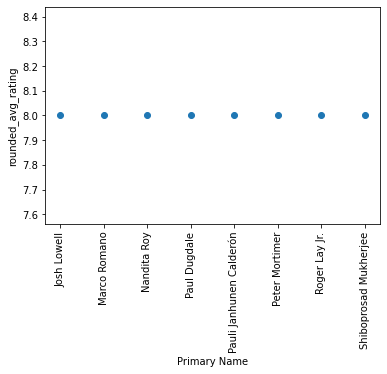

In [62]:
df1 = director_db.reset_index()

# Create a scatter plot of avg_rating vs primary_name
plt.scatter(df1['primary_name'], df1['rounded_avg_rating'])

# Set the x-axis label and rotate the tick labels to prevent overlapping
plt.xlabel('Primary Name')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('rounded_avg_rating')

# Show the plot
plt.show()

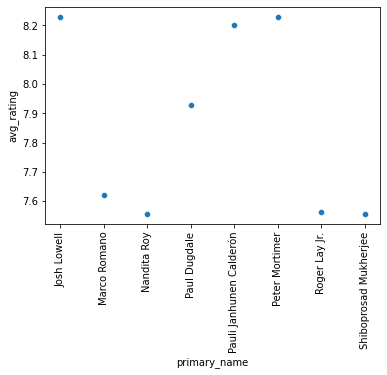

In [63]:
sns.scatterplot(x='primary_name', y='avg_rating', data=director_db)

# Set the x-axis labels to be rotated
plt.xticks(rotation=90)

# Show the plot
plt.show()